In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow import keras

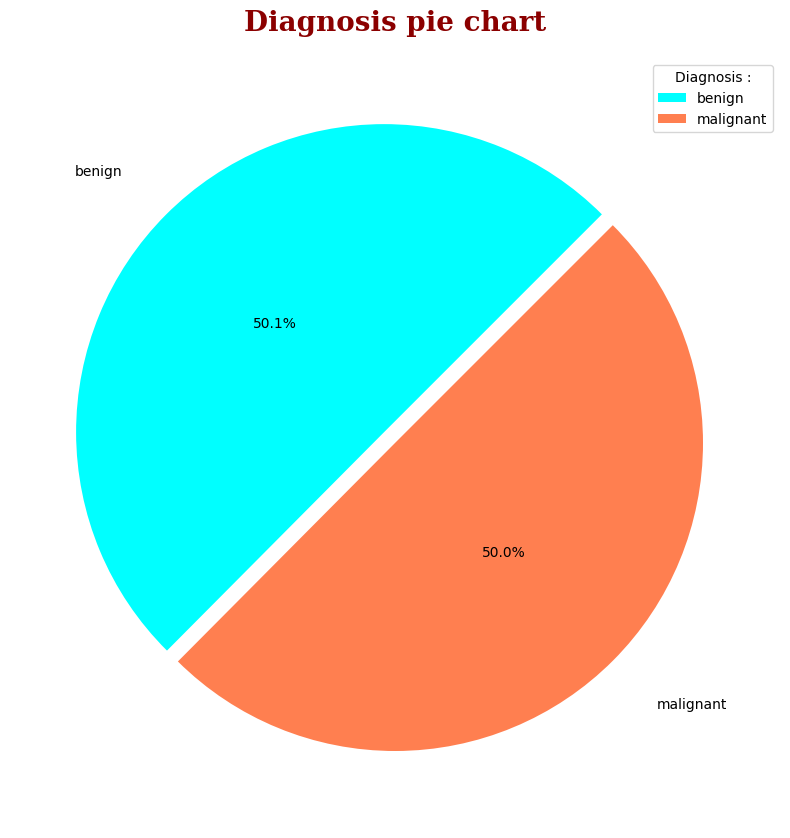

In [ ]:
# prepration
SAMPLE =2000
X ,Y =make_classification(n_samples =SAMPLE ,n_features =15 ,n_informative =3 ,n_redundant =1) 
x =minmax_scale(X ,feature_range=(0,1)).astype(np.float32) 
y =Y.reshape(-1,1).astype(np.int32)
xtr ,xte ,ytr ,yte =train_test_split(x , y ,test_size =0.2) 
diagnosis_count =[] 
y =list(y)
diagnosis_count.append(y.count(0))
diagnosis_count.append(y.count(1))
colors =['cyan', 'coral'] 
labels =['benign', 'malignant']
explods =[0.05 ,0.0]
font_title ={'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        }
fig =plt.figure(num =1 ,dpi =100 ,figsize =(10,10))
ax1 =fig.add_subplot(1,1,1)
ax1.pie(diagnosis_count ,
        colors =colors ,
        labels =labels ,
        explode =explods ,
        startangle =45 ,
        autopct ='%1.1f%%' ,
        pctdistance =0.5 ,
        labeldistance =1.2)
plt.title(label ='Diagnosis pie chart' ,pad =20 ,fontdict =font_title)
plt.legend(title ='Diagnosis :')
plt.show()

In [ ]:
# model definition 
def create_model(a_function ,h_unit ,l_rate ,d_rate) : 
  model =keras.Sequential()
  model.add(keras.layers.Dense(units =h_unit ,input_dim =15))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation(a_function))
  model.add(keras.layers.Dropout(rate =d_rate))
  model.add(keras.layers.Dense(units =h_unit))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation(a_function))
  model.add(keras.layers.Dropout(rate =d_rate))
  model.add(keras.layers.Dense(units =h_unit))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation(a_function))
  model.add(keras.layers.Dropout(rate =d_rate))
  model.add(keras.layers.Dense(units =h_unit))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation(a_function))
  model.add(keras.layers.Dropout(rate =d_rate))
  model.add(keras.layers.Dense(units =h_unit))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation(a_function))
  model.add(keras.layers.Dropout(rate =d_rate))
  model.add(keras.layers.Dense(units =1))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation('sigmoid'))
  model.compile(optimizer =keras.optimizers.Adam(learning_rate =l_rate) ,
                loss ='binary_crossentropy' ,
                metrics =['binary_accuracy'])
  return model


In [ ]:
# random search cross validation 
cls =KerasClassifier(create_model ,
                    optimizer =keras.optimizers.Adam(learning_rate=0.0001) ,
                    loss =keras.losses.BinaryCrossentropy ,
                    batch_size =32 ,
                    epochs =1 ,
                    verbose =0
)
params ={ 
    'model__a_function' : ['relu' ,'leaky_relu' ,'tanh'] ,
    'model__h_unit' : [128 ,256 ,512] ,
    'model__l_rate' : [0.0005 ,0.0006 ,0.0007] ,
    'model__d_rate' : [0.2 ,0.3 ,0.5]
}
rs =RandomizedSearchCV(estimator =cls ,param_distributions =params ,n_iter =5 ,cv =4)
rs_result =rs.fit(xtr ,ytr)

In [ ]:
# model training
best_params =rs_result.best_params_
model =create_model(best_params['model__a_function'] ,best_params['model__h_unit'] ,best_params['model__l_rate'] ,best_params['model__d_rate'])
model_path ='model.keras'
model.save(model_path ,overwrite =True ,zipped =None)
epochs =100 
batch_size =64
val_batch_size =32
hist =model.fit(xtr ,ytr ,batch_size =batch_size ,epochs =epochs ,validation_data =(xte ,yte) ,validation_batch_size =val_batch_size ,verbose =2)

In [47]:
# model evaluation 
Y =model.predict(xte) 
Yte =(Y > 0.5).astype(np.int32)
eva =[]
acc =accuracy_score(y_true =yte ,y_pred =Yte)
pre =precision_score(y_true =yte ,y_pred =Yte)
re =recall_score(y_true =yte ,y_pred =Yte)
f1 =f1_score(y_true =yte ,y_pred =Yte)
eva.append(acc)
eva.append(pre)
eva.append(re)
eva.append(f1)
eva

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[0.8775, 0.8737864077669902, 0.8866995073891626, 0.8801955990220048]

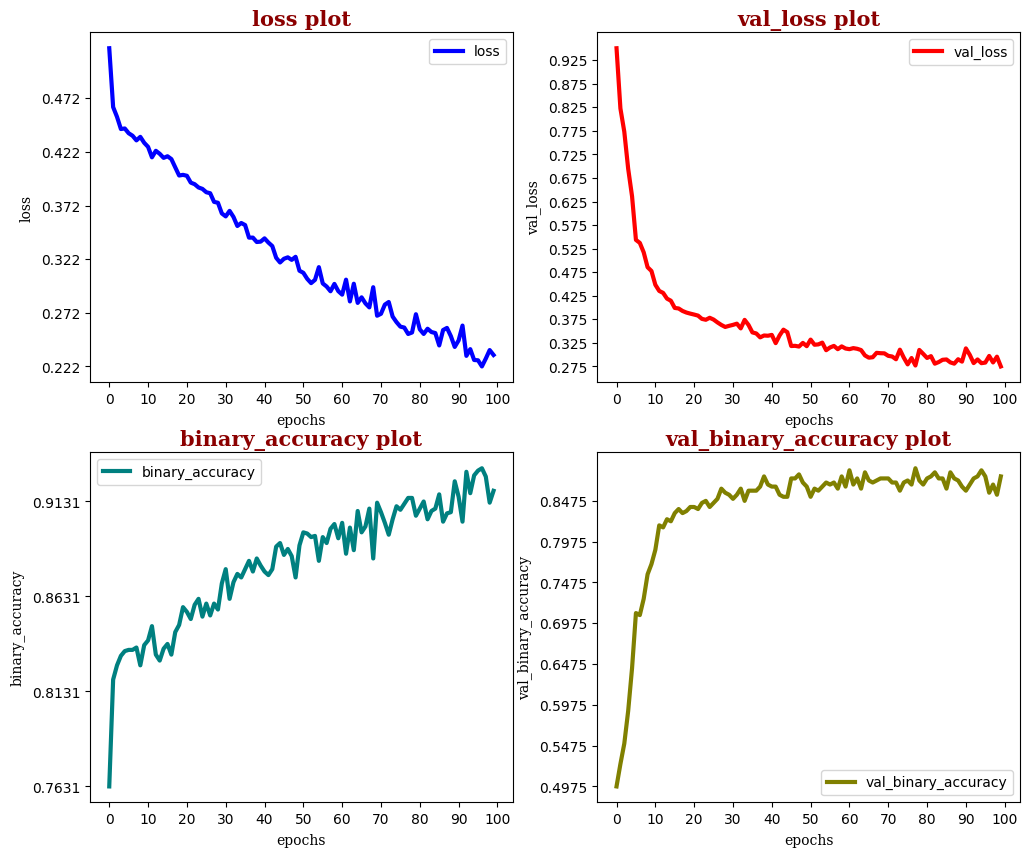

In [49]:
# evaluation plot
def font_config(family ,color ,weight ,size) : 
    font ={'family': family ,
        'color':  color ,
        'weight': weight ,
        'size': size 
        }
    return font
def plot_detail(plot ,scale) : 
    font_label =font_config('serif' ,'black' ,'normal' ,10)
    font_title =font_config('serif' ,'darkred' ,'bold' ,15)
    plt.xticks(ticks =np.arange(0 ,epochs+1 ,10))
    plt.yticks(ticks =np.arange(np.min(hist.history[plot]) ,np.max(hist.history[plot]) ,scale))
    plt.xlabel(xlabel ='epochs' ,labelpad =5 ,fontdict =font_label)
    plt.ylabel(ylabel =plot ,labelpad =5 ,fontdict =font_label)
    plt.title(label =f'{plot} plot' ,pad=5 ,fontdict =font_title)
    plt.legend()
fig =plt.figure(num =2 ,figsize =(12,10) ,dpi =100) 
ax1 =fig.add_subplot(2,2,1)
ax1.plot(hist.history['loss'] ,color ='blue' ,lw =3 ,ls ='-' ,label ='loss')
plot_detail('loss' ,0.05)
ax2 =fig.add_subplot(2,2,2)
ax2.plot(hist.history['val_loss'] ,color ='red' ,lw =3 ,ls ='-' ,label ='val_loss')
plot_detail('val_loss' ,0.05)
ax3 =fig.add_subplot(2,2,3)
ax3.plot(hist.history['binary_accuracy'] ,color ='teal' ,lw =3 ,ls ='-' ,label ='binary_accuracy')
plot_detail('binary_accuracy' ,0.05)
ax4 =fig.add_subplot(2,2,4)
plt.plot(hist.history['val_binary_accuracy'] ,color ='olive' ,lw =3 ,ls ='-' ,label ='val_binary_accuracy')
plot_detail('val_binary_accuracy' ,0.05)
plt.show()